In [40]:
import torch
torch.__version__

'0.3.0.post4'

In [41]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## First Neural Network Using Pytorch

We present our first neural network which learns to map training examples (input array) to targets (output array). 
Lets assume that we work for one of the largest online companies called Wondemovies, which is into serving videos on-demand. Our training dataset contains a feature which represents average hours spent by users watching movies in the platform, we would like to predict how much time each user would spend on the platform in the coming week. Its just a imaginary use case, don't think too much about it. Some of the high level activities for building such a solution are:

1. Data preperation : **get_data()** function prepares the tensors (arrays) containing input and output data.
2. Create learnable parameters : **get_weights()** function provides us with tensors containing random values , which we will optimize to solve our problem.
3. Network Model : **simple_network()** produces the output for the input data applying a linear rule , multiply weights with input data and add the bias term (y = Wx+b).
4. Loss : **loss_fn()** provides information about how good the model is.
5. Optimizer : **optimize()** function helps us in adjusting random weights created initially to help the model calculate target values more accurately.

In [42]:
# Training Data
def get_data():
    train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
    train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
    dtype = torch.FloatTensor
    X = Variable(torch.from_numpy(train_X).type(dtype),requires_grad=False).view(17,1)
    y = Variable(torch.from_numpy(train_Y).type(dtype),requires_grad=False)
    return X,y

def plot_variable(x,y,z='',**kwargs):
    l = []
    for a in [x,y]:
        if type(a) == Variable:
            l.append(a.data.numpy())
    plt.plot(l[0],l[1],z,**kwargs)

def get_weights():
    w = Variable(torch.randn(1),requires_grad = True)
    b = Variable(torch.randn(1),requires_grad=True)
    return w,b

def simple_network(x):
    y_pred = torch.matmul(X,w)+b
    return y_pred

def loss_fn(y,y_pred):
    loss = (y_pred-y).pow(2).sum()
    for param in [w,b]:
        if not param.grad is None: param.grad.data.zero_()
    loss.backward()
    return loss.data[0]


def optimize(learning_rate):
    w.data -= learning_rate * w.grad.data
    b.data -= learning_rate * b.grad.data

learning_rate = 1e-4

In [44]:
x,y = get_data()               # x - represents training data,y - represents target variables
w,b = get_weights()           # w,b - Learnable parameters
for i in range(500):
    y_pred = simple_network(x) # function which computes wx + b
    loss = loss_fn(y,y_pred)   # calculates sum of the squared differences of y and y_pred
    if i % 50 == 0: 
        print(loss)
    optimize(learning_rate)    # Adjust w,b to minimize the loss

NameError: name 'X' is not defined

NameError: name 'y_pred' is not defined

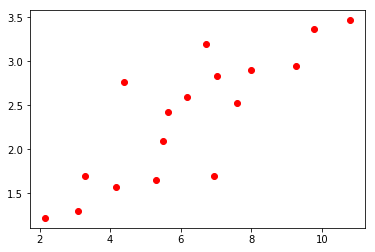

In [45]:
x_numpy = x.data.numpy()
plot_variable(x,y,'ro')
plot_variable(x,y_pred,label='Fitted line')

## Tensor introduction

### Scalar

In [46]:
x = torch.rand(10)
x.size()

torch.Size([10])

### Vector

In [47]:
temp = torch.FloatTensor([23,24,24.5,26,27.2,23.0])
temp.size()

torch.Size([6])

### Matrix

In [48]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)

(506, 13)


In [49]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='<U7')

In [50]:
boston_tensor = torch.from_numpy(boston.data)
boston_tensor.size()

torch.Size([506, 13])

In [51]:
boston_tensor[:2]



Columns 0 to 7 
   0.0063   18.0000    2.3100    0.0000    0.5380    6.5750   65.2000    4.0900
   0.0273    0.0000    7.0700    0.0000    0.4690    6.4210   78.9000    4.9671

Columns 8 to 12 
   1.0000  296.0000   15.3000  396.9000    4.9800
   2.0000  242.0000   17.8000  396.9000    9.1400
[torch.DoubleTensor of size 2x13]

In [52]:
boston_tensor[:10,:5]


  0.0063  18.0000   2.3100   0.0000   0.5380
  0.0273   0.0000   7.0700   0.0000   0.4690
  0.0273   0.0000   7.0700   0.0000   0.4690
  0.0324   0.0000   2.1800   0.0000   0.4580
  0.0691   0.0000   2.1800   0.0000   0.4580
  0.0299   0.0000   2.1800   0.0000   0.4580
  0.0883  12.5000   7.8700   0.0000   0.5240
  0.1446  12.5000   7.8700   0.0000   0.5240
  0.2112  12.5000   7.8700   0.0000   0.5240
  0.1700  12.5000   7.8700   0.0000   0.5240
[torch.DoubleTensor of size 10x5]

### 3d- tensor

In [1]:
from PIL import Image

panda = np.array(Image.open('../data/images/panda.jpg').resize((224,224)))
panda_tensor = torch.from_numpy(panda)
panda_tensor.size()

NameError: name 'np' is not defined

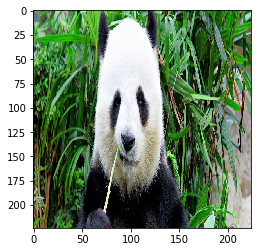

In [54]:
plt.imshow(panda);

### Slicing Tensor

In [55]:
sales = torch.FloatTensor([1000.0,323.2,333.4,444.5,1000.0,323.2,333.4,444.5])

In [56]:
sales[:5]


 1000.0000
  323.2000
  333.4000
  444.5000
 1000.0000
[torch.FloatTensor of size 5]

In [57]:
sales[:-5]


 1000.0000
  323.2000
  333.4000
[torch.FloatTensor of size 3]

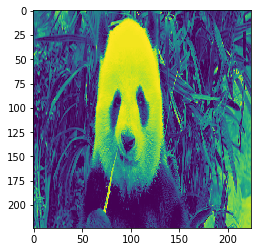

In [58]:
plt.imshow(panda_tensor[:,:,0].numpy());

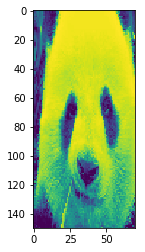

In [59]:
plt.imshow(panda_tensor[25:175,60:130,0].numpy());

### Select specific element of tensor

In [60]:
#torch.eye(shape) produces an diagonal matrix with 1 as it diagonal #elements.
sales = torch.eye(3,3)
sales[0,1]

0.0

### 4D Tensor

In [61]:
from glob import glob
#Read cat images from disk
data_path='/Users/vishnu/Documents/fastAIPytorch/fastai/courses/dl1/data/dogscats/train/cats/'
cats = glob(data_path+'*.jpg')
#Convert images into numpy arrays
cat_imgs = np.array([np.array(Image.open(cat).resize((224,224))) for cat in
cats[:64]])
cat_imgs = cat_imgs.reshape(-1,224,224,3)
cat_tensors = torch.from_numpy(cat_imgs)
cat_tensors.size()

torch.Size([64, 224, 224, 3])

### Tensor addition and multiplication

In [62]:
#Various ways you can perform tensor addition
a = torch.rand(2,2) 
b = torch.rand(2,2)
c = a + b
d = torch.add(a,b)
#For in-place addition
a.add_(5)

#Multiplication of different tensors

a*b
a.mul(b)
#For in-place multiplication
a.mul_(b)


 4.2884  1.1311
 4.5124  0.0986
[torch.FloatTensor of size 2x2]

### On GPU

In [63]:
a = torch.rand(10000,10000)
b = torch.rand(10000,10000)

a.matmul(b)
#Time taken : 3.23 s


 2464.5203  2463.9946  2466.0151  ...   2477.0486  2457.8650  2459.7793
 2514.1521  2496.4634  2503.5515  ...   2483.9187  2494.0320  2493.4453
 2531.8433  2528.8306  2544.0671  ...   2534.6736  2516.6255  2525.0925
              ...                  ⋱                 ...               
 2560.2703  2556.7380  2549.9351  ...   2543.4990  2537.1301  2541.0215
 2513.9526  2513.4009  2504.7395  ...   2529.0278  2500.7932  2510.9741
 2499.6880  2503.4753  2512.5913  ...   2519.3479  2482.1230  2500.2029
[torch.FloatTensor of size 10000x10000]

In [64]:
#Move the tensors to GPU
a = a.cuda()
b = b.cuda()
a.matmul(b)
#Time taken : 11.2 µs  

AssertionError: Torch not compiled with CUDA enabled

### Variables

In [65]:
from torch.autograd import Variable
x = Variable(torch.ones(2,2),requires_grad=True)
y = x.mean()
y.backward()
x.grad

Variable containing:
 0.2500  0.2500
 0.2500  0.2500
[torch.FloatTensor of size 2x2]

In [66]:
x.grad_fn

In [67]:
x.data


 1  1
 1  1
[torch.FloatTensor of size 2x2]

In [68]:
y.grad_fn

### Create data for our neural network

In [69]:
def get_data():
    train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
    train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
    dtype = torch.FloatTensor
    X = Variable(torch.from_numpy(train_X).type(dtype),requires_grad=False).view(17,1)
    y = Variable(torch.from_numpy(train_Y).type(dtype),requires_grad=False)
    return X,y

### Create learnable parameters

In [70]:
def get_weights():
    w = Variable(torch.randn(1),requires_grad = True)
    b = Variable(torch.randn(1),requires_grad=True)
    return w,b

### Implement Neural Network

In [71]:
def simple_network(x):
    y_pred = torch.matmul(x,w)+b
    return y_pred

### Implement Neural Network in Pytorch

In [72]:
import torch.nn as nn
f = nn.Linear(17,1) # Much simpler.
f

Linear(in_features=17, out_features=1)

### Implementing Loss Function

In [73]:
def loss_fn(y,y_pred):
    loss = (y_pred-y).pow(2).sum()
    for param in [w,b]:
        if not param.grad is None: param.grad.data.zero_()
    loss.backward()
    return loss.data[0]

In [74]:
### Implementing Optimizer

In [75]:
def optimize(learning_rate):
    w.data -= learning_rate * w.grad.data
    b.data -= learning_rate * b.grad.data

## Loading Data

### Defining Dataset

In [76]:
from torch.utils.data import Dataset
class DogsAndCatsDataset(Dataset):
    def __init__(self,):
        pass
    def __len__(self):
        pass
    def __getitem__(self,idx):
        pass

In [77]:
class DogsAndCatsDataset(Dataset):
    def __init__(self,root_dir,size=(224,224)):
        self.files = glob(root_dir)
        self.size = size
    def __len__(self):
        return len(self.files)
    def __getitem__(self,idx):
        img = np.asarray(Image.open(self.files[idx]).resize(self.size))
        label = self.files[idx].split('/')[-2]
        return img,label

### Defining DataLoader to iterate over Dogs and Cats Dataset

In [78]:
from torch.utils.data import Dataset, DataLoader

dataloader = DataLoader(DogsAndCatsDataset,batch_size=32,num_workers=2)
for imgs , labels in dataloader:
        #Apply your DL on the dataset.
    break

TypeError: object of type 'type' has no len()